In [11]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [12]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]


In [13]:
# from langchain_openai import ChatOpenAI

# llm=ChatOpenAI(model="gpt-4o")

In [14]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-2.5-32b")
# result=llm.invoke(messages)
# result

In [15]:
from langchain_core.messages import HumanMessage, SystemMessage


def title(state:MessagesState):
    # System message
    sys_msg = SystemMessage(content="You are a helpful assistant. creata a title for user ask")
    return {"messages":[llm.invoke([sys_msg] + state["messages"])]}

def content(state:MessagesState):
    # System message
    sys_msg = SystemMessage(content="You are a helpful assistant. explain the topic in not more than 10")
    return {"messages":[llm.invoke([sys_msg] + state["messages"])]}

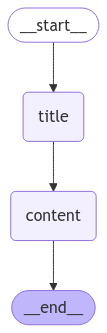

In [16]:
from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display


builder=StateGraph(MessagesState)


## Define the node
builder.add_node("title",title)
builder.add_node("content",content)

## Define the edges

builder.add_edge(START,"title")
builder.add_edge("title", "content")
builder.add_edge("content", END)

react_graph=builder.compile()
# Show
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [19]:
messages = [HumanMessage(content="who is sachin tendulkar?")]
messages = react_graph.invoke({"messages": messages})

In [20]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

who is sachin tendulkar?
================================== Ai Message ==================================

"Who is Sachin Tendulkar? Exploring the Legacy of Cricket's Greatest Icon"
================================== Ai Message ==================================

Sachin Tendulkar is a former Indian cricketer often regarded as one of the greatest batsmen in the history of the sport. Born in Bombay (now Mumbai) in 1973, he made his Test debut in 1989 at the age of 16, becoming one of the youngest players to represent India. Tendulkar is known for his elegant batting style and his ability to perform under pressure. He retired in 2013 after scoring a record 100 international centuries across Test and ODI formats. Tendulkar was awarded the Bharat Ratna, India's highest civilian honor, in 2013, recognizing his immense contributions to cricket. His career is marked by numerous achievements, including multiple Ma